In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

In [11]:
def peak(x, A, a, loc, scale):
    return A * stats.skewnorm.pdf(x, a=a, loc=loc, scale=scale)

In [12]:
def model(x, A1, a1, loc1, scale1, A2, a2, loc2, scale2):
    return peak(x, A1, a1, loc1, scale1) + peak(x, A2, a2, loc2, scale2)

In [14]:
p0 = (500, 1.2, 140, 10, 600, 1.5, 170, 15)

In [15]:
xexp = np.linspace(120, 220, 70)
yexp = model(xexp, *p0)

In [25]:
popt, pcov = optimize.curve_fit(
    model, xexp, yexp, p0=(1000, 1, 150, 1, 1000, 1, 180, 1),
    bounds = [
        (1, 0.1, 140, 0.1, 1, 0.1, 170, 0.1), (1e4, 2.0, 160, 100, 1e4, 2.0, 190, 100)
    ]
)
popt

array([500. ,   1.2, 140. ,  10. , 600. ,   1.5, 170. ,  15. ])

In [26]:
xlin = np.linspace(xexp.min(), xexp.max(), 250)
yhat = model(xlin, *popt)

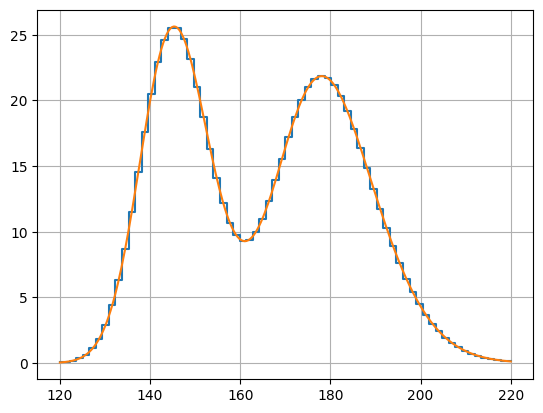

In [27]:
fig, axe = plt.subplots()
axe.step(xexp, yexp, where="mid")
axe.plot(xlin, yhat)
axe.grid()